In [2]:
import numpy as np
import mcubes
from scipy import spatial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
p = np.loadtxt('armadillo_sub.xyz')


p[0]: [-12.9176      -8.36989    -14.5982       0.73817103  -0.53405007
  -0.41218206]


In [4]:
print(f"p[0]: {p[:,0]}")

p[0]: [-12.9176   -13.193    -15.5819   ... -23.764999 -59.904099   2.22932 ]


In [3]:
#compute the enclosing grid
#TODO
maxx = np.max(p[:,0])
minx = np.min(p[:,0])
maxy = np.max(p[:,1])
miny = np.min(p[:,1])
maxz = np.max(p[:,2])
minz = np.min(p[:,2])

print(minx,maxx,miny,maxy,minz,maxz)

-63.4557 63.499001 -54.189201 97.078697 -57.679401 57.5952


In [4]:
#normalize the shape
p[:,0] = 2 * (p[:,0] - minx)/(maxx - minx) - 1
p[:,1] = 2 * (p[:,1] - miny)/(maxy - miny) - 1
p[:,2] = 2 * (p[:,2] - minz)/(maxz - minz) - 1


grid_size = 10
X, Y, Z = np.mgrid[-1:1:10j, -1:1:10j, -1:1:10j]
kdtree = spatial.KDTree(p[:,:3])
u = np.zeros_like(X)

In [ ]:
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            query=[X[i,j,k], Y[i,j,k], Z[i,j,k]]
            distance,index = kdtree.query(query)
            normales = p[index,-3:]
            values = p[index,:3]
            vector= values-query
            #Extract the 0 level set (marching_cubes of the mcubes library)
            u[i,j,k] = np.dot(vector,normales)
            print(u[i,j,k])


In [6]:
vertices, triangles = mcubes.marching_cubes(u,0)

mcubes.export_obj(vertices, triangles, 'result.obj')

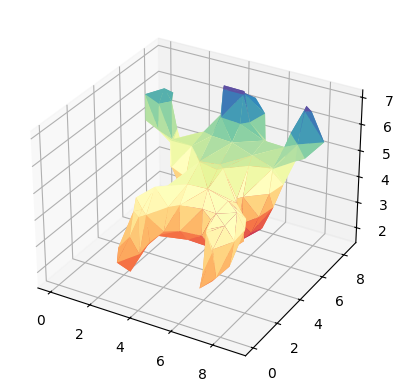

In [7]:
#show the mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:,0], vertices[:,1], triangles, vertices[:,2], cmap='Spectral')
plt.show()

# A keypoint about 
## 1) kdtree

A **k-d tree** (short for k-dimensional tree) is a data structure used for organizing points in a k-dimensional space. It is particularly useful for tasks such as nearest neighbor search, range search, and other spatial queries. The k-d tree is a binary search tree where each node represents a k-dimensional point, and each non-leaf node generates a splitting hyperplane that divides the space into two half-spaces.

### How k-d Tree Works

1. **Construction**:
   - The k-d tree is constructed by recursively splitting the data points along different dimensions.
   - At each level of the tree, a different dimension is chosen as the splitting dimension, typically cycling through the dimensions in a round-robin fashion.
   - The median of the points along the chosen dimension is selected as the splitting point, ensuring a balanced tree.

2. **Structure**:
   - Each node in the k-d tree represents a point in k-dimensional space.
   - Each non-leaf node splits the space into two half-spaces based on the value of the chosen dimension.
   - The left subtree contains points with values less than the splitting value, and the right subtree contains points with values greater than or equal to the splitting value.

3. **Nearest Neighbor Search**:
   - To find the nearest neighbor of a query point, the k-d tree is traversed starting from the root.
   - At each node, the algorithm decides which subtree to explore based on the splitting dimension and the query point's value.
   - The search continues until a leaf node is reached, and the closest point found so far is recorded.
   - The algorithm then backtracks, checking other subtrees if there is a possibility of finding a closer point.

4. **Range Search**:
   - To find all points within a given range, the k-d tree is traversed, and at each node, the algorithm checks if the splitting hyperplane intersects the query range.
   - If it does, both subtrees are explored; otherwise, only the relevant subtree is explored.

### Example Code

Here is an example of how to construct and use a k-d tree in Python using the `scipy.spatial.KDTree` class:



In [6]:
import numpy as np
from scipy.spatial import KDTree

# Example data points in 2D space
points = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2]
])

# Construct the k-d tree
kdtree = KDTree(points)

# Query point
query_point = np.array([9, 2])

# Find the nearest neighbor
distance, index = kdtree.query(query_point)
nearest_neighbor = points[index]

print(f"Query Point: {query_point}")
print(f"Nearest Neighbor: {nearest_neighbor}")
print(f"Distance: {distance}")

# Range search: find all points within a distance of 3 from the query point
radius = 3
indices = kdtree.query_ball_point(query_point, radius)
points_within_radius = points[indices]

print(f"Points within radius {radius} of {query_point}:")
print(points_within_radius)

Query Point: [9 2]
Nearest Neighbor: [8 1]
Distance: 1.4142135623730951
Points within radius 3 of [9 2]:
[[8 1]
 [7 2]]




### Explanation

1. **Data Points**:
   - An array of 2D points is defined.

2. **Construct k-d Tree**:
   - The k-d tree is constructed using `KDTree(points)` from the `scipy.spatial` module.

3. **Nearest Neighbor Search**:
   - The `query` method is used to find the nearest neighbor of the query point. It returns the distance and the index of the nearest neighbor.

4. **Range Search**:
   - The `query_ball_point` method is used to find all points within a specified radius from the query point. It returns the indices of the points within the radius.

### Key Points

- **k-d Tree**: A binary search tree for organizing points in k-dimensional space.
- **Construction**: Recursively splits points along different dimensions, using the median to ensure balance.
- **Nearest Neighbor Search**: Efficiently finds the closest point to a query point by traversing the tree.
- **Range Search**: Finds all points within a specified range by exploring relevant subtrees.

The k-d tree is a powerful data structure for spatial queries, providing efficient algorithms for nearest neighbor search and range search in multi-dimensional spaces.

## 2) plot_trisurf

`plot_trisurf` is a function in the `matplotlib` library used for plotting 3D triangular surfaces (meshes). It is particularly useful for visualizing 3D data points that form a surface, such as those obtained from 3D scanning or computational geometry.

### Key Concepts

1. **Triangular Surface (Mesh)**:
   - A triangular surface is a 3D surface composed of triangles. Each triangle is defined by three vertices (points) in 3D space.
   - Meshes are commonly used in computer graphics and computational geometry to represent complex surfaces.

2. **`plot_trisurf` Function**:
   - The `plot_trisurf` function in `matplotlib` allows you to plot a 3D triangular surface by specifying the vertices and the triangles that connect them.
   - It is part of the `Axes3D` module in `matplotlib`.

### Example Code

Here is an example of how to use `plot_trisurf` to plot a 3D triangular surface:



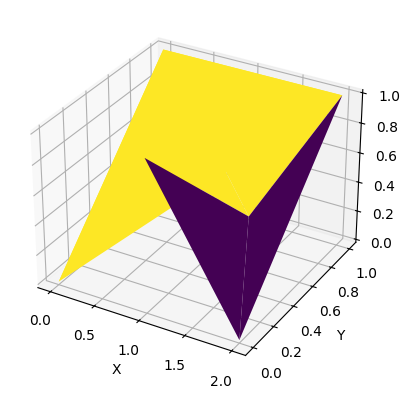

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data: vertices of the mesh
x = np.array([0, 1, 2, 0, 1, 2])
y = np.array([0, 0, 0, 1, 1, 1])
z = np.array([0, 1, 0, 1, 0, 1])

# Triangles: each row defines a triangle by the indices of its vertices
triangles = np.array([
    [0, 1, 3],
    [1, 4, 3],
    [1, 2, 4],
    [2, 5, 4],
    [3, 4, 5],
    [3, 5, 0]
])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangular surface
ax.plot_trisurf(x, y, z, triangles=triangles, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()



### Explanation

1. **Vertices**:
   - The `x`, `y`, and `z` arrays define the coordinates of the vertices of the mesh.

2. **Triangles**:
   - The `triangles` array defines the connectivity of the vertices. Each row specifies a triangle by the indices of its three vertices.

3. **Create a 3D Plot**:
   - A 3D plot is created using `fig.add_subplot(111, projection='3d')`.

4. **Plot the Triangular Surface**:
   - The `plot_trisurf` function is used to plot the triangular surface. The `cmap` parameter specifies the colormap for the surface.

5. **Set Labels**:
   - Labels for the x, y, and z axes are set using `ax.set_xlabel`, `ax.set_ylabel`, and `ax.set_zlabel`.

6. **Show the Plot**:
   - The plot is displayed using `plt.show()`.

### Key Points

- **`plot_trisurf` Function**: Used to plot 3D triangular surfaces (meshes) in `matplotlib`.
- **Vertices and Triangles**: The vertices define the points in 3D space, and the triangles define the connectivity of these points to form the surface.
- **3D Plotting**: The function is part of the `Axes3D` module in `matplotlib` and is used for visualizing 3D data.

## 3) marching cubes

**Marching Cubes** is a computer graphics algorithm used to extract a polygonal mesh of an isosurface from a three-dimensional scalar field (often represented as a volumetric dataset). The algorithm was developed by William E. Lorensen and Harvey E. Cline in 1987. It is widely used in medical imaging, scientific visualization, and computer graphics to create 3D surface representations from volumetric data.

### Key Concepts

1. **Isosurface**:
   - An isosurface is a surface that represents points of a constant value within a volume of space. For example, in medical imaging, an isosurface might represent the boundary of an organ within a 3D scan.

2. **Scalar Field**:
   - A scalar field is a 3D grid of scalar values, where each value represents a property (such as density or intensity) at a specific point in space.

3. **Cubes**:
   - The algorithm divides the scalar field into a grid of cubes. Each cube has eight vertices, and each vertex has a scalar value.

### How Marching Cubes Works

1. **Cube Configuration**:
   - For each cube in the grid, the algorithm determines the configuration of the cube based on the scalar values at its vertices. There are 256 possible configurations (2^8) since each vertex can be either above or below the isosurface value.

2. **Edge Interpolation**:
   - For each cube configuration, the algorithm interpolates the positions of the vertices along the edges of the cube where the isosurface intersects. This creates the vertices of the triangles that approximate the isosurface within the cube.

3. **Triangle Generation**:
   - The algorithm uses a precomputed lookup table to determine the set of triangles for each cube configuration. This ensures that the triangles form a continuous surface.

4. **Mesh Construction**:
   - The triangles generated for each cube are combined to form a polygonal mesh that approximates the isosurface.

### Example Code

Here is an example of how to use the `marching_cubes` function from the `skimage.measure` module in Python to extract an isosurface from a 3D scalar field:



In [ ]:
%pip install scikit-image

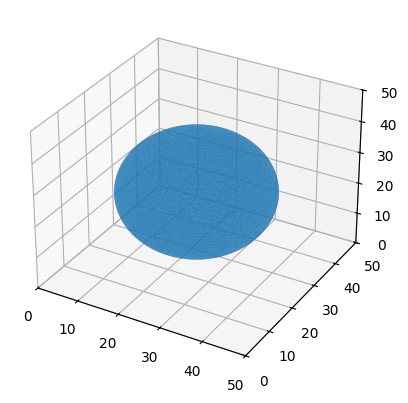

In [9]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate a 3D scalar field (e.g., a sphere)
x, y, z = np.mgrid[-1:1:50j, -1:1:50j, -1:1:50j]
scalar_field = x**2 + y**2 + z**2

# Extract the isosurface using marching cubes
verts, faces, normals, values = measure.marching_cubes(scalar_field, level=0.5)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh
mesh = Poly3DCollection(verts[faces], alpha=0.7)
ax.add_collection3d(mesh)

# Set plot limits
ax.set_xlim(0, scalar_field.shape[0])
ax.set_ylim(0, scalar_field.shape[1])
ax.set_zlim(0, scalar_field.shape[2])

# Show the plot
plt.show()



### Explanation

1. **Generate Scalar Field**:
   - A 3D scalar field is generated using `np.mgrid` to create a grid of points. In this example, the scalar field represents a sphere.

2. **Extract Isosurface**:
   - The `measure.marching_cubes` function is used to extract the isosurface from the scalar field. The `level` parameter specifies the isosurface value.

3. **Create 3D Plot**:
   - A 3D plot is created using `matplotlib`. The `Poly3DCollection` class is used to create a polygonal mesh from the vertices and faces generated by the `marching_cubes` function.

4. **Plot the Mesh**:
   - The mesh is added to the plot, and the plot limits are set to match the dimensions of the scalar field.

### Key Points

- **Marching Cubes Algorithm**: Extracts a polygonal mesh of an isosurface from a 3D scalar field.
- **Isosurface**: Represents points of a constant value within a volume of space.
- **Scalar Field**: A 3D grid of scalar values representing a property at each point in space.
- **Edge Interpolation and Triangle Generation**: Interpolates the positions of vertices along cube edges and generates triangles to approximate the isosurface.